In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# custom functions
from functions import *

2024-11-16 15:44:32.924816: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731768272.944053   41277 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731768272.949213   41277 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-16 15:44:32.966502: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('../data/clean/dataset.csv').fillna('').sample(frac=1).reset_index(drop=True)

In [3]:
df

,name,url,title,lemmes,funny
0,le_parisien,https://www.leparisien.fr/jo-paris-2024/gerald...,"Gérald Darmanin : « Après la cérémonie, si...",gerald darmanin apres ceremonie passer bien pa...,0
1,ouest_france,https://www.ouest-france.fr/sport/football/equ...,Uruguay. Marcelo Bielsa confie que son autorit...,uruguay marcelo bielsa confier autorite ete af...,0
2,le_parisien,https://www.leparisien.fr/jo-paris-2024/jo-par...,"JO Paris 2024, taekwondo : des protections pou...",jo paris taekwondo protection amortir coup poi...,0
3,franceinfotv,https://www.francetvinfo.fr/france/normandie/e...,Insolite : carton plein pour le tracteur pulling,insolite carton plein tracteur pulling,0
4,franceinfotv,https://www.francetvinfo.fr/monde/proche-orien...,Guerre au Proche-Orient : après la mort de dou...,guerre orient mort adolescent golan israel pro...,0
...,...,...,...,...,...
102080,liberation,https://www.liberation.fr/environnement/climat...,EN IMAGES - La tempête Boris plonge l’Europe s...,images tempete boris plonger europe eau,0
102081,franceinfotv,https://www.francetvinfo.fr/meteo/meteo-france...,Bulletin météo du mardi 15 octobre 2024 à 19h55,bulletin meteo mardi octobre,0
102082,ouest_france,https://www.ouest-france.fr/sport/football/com...,Comment le jeu vidéo Football Manager 2025 a ...,jeu video football manager integre football fe...,0
102083,la_depeche,https://www.ladepeche.fr/2024/09/28/70-ans-dar...,70 ans d’architecture pour trois générations d...,an architecture generation batisseur albigeois,0


In [4]:
X = CountVectorizer().fit_transform(df.lemmes)

In [5]:
X.shape

(102085, 47545)

In [6]:
X = CountVectorizer(min_df=50).fit_transform(df.lemmes)

In [7]:
X.shape

(102085, 2854)

In [8]:
X.toarray().shape

(102085, 2854)

In [9]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

<Figure size 800x600 with 0 Axes>

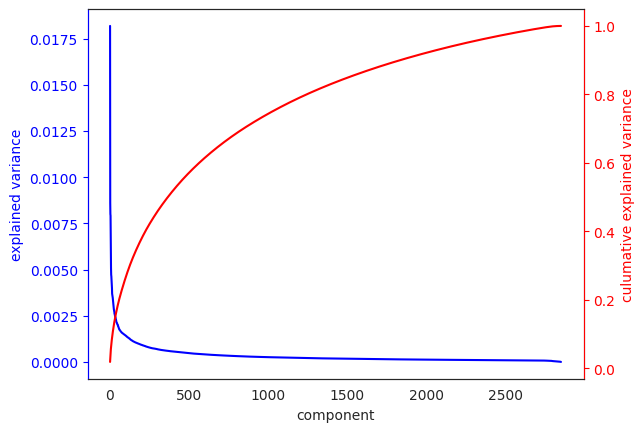

In [10]:
pca_graph(X.toarray())

In [11]:
y = df.funny

In [12]:
umap_embedding = umap.UMAP(n_components=2, n_jobs=-1, verbose=1, random_state=314).fit_transform(X)    

/home/michael/.pyenv/versions/funnypress-data-study/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP(n_jobs=1, random_state=314, verbose=1)
Sat Nov 16 15:46:28 2024 Construct fuzzy simplicial set
Sat Nov 16 15:46:28 2024 Finding Nearest Neighbors
Sat Nov 16 15:46:28 2024 Building RP forest with 21 trees
Sat Nov 16 15:47:12 2024 metric NN descent for 17 iterations
	 1  /  17
	 2  /  17
	 3  /  17
	 4  /  17
	 5  /  17
	 6  /  17
	Stopping threshold met -- exiting after 6 iterations
Sat Nov 16 15:48:00 2024 Finished Nearest Neighbor Search
Sat Nov 16 15:48:04 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Nov 16 15:50:36 2024 Finished embedding


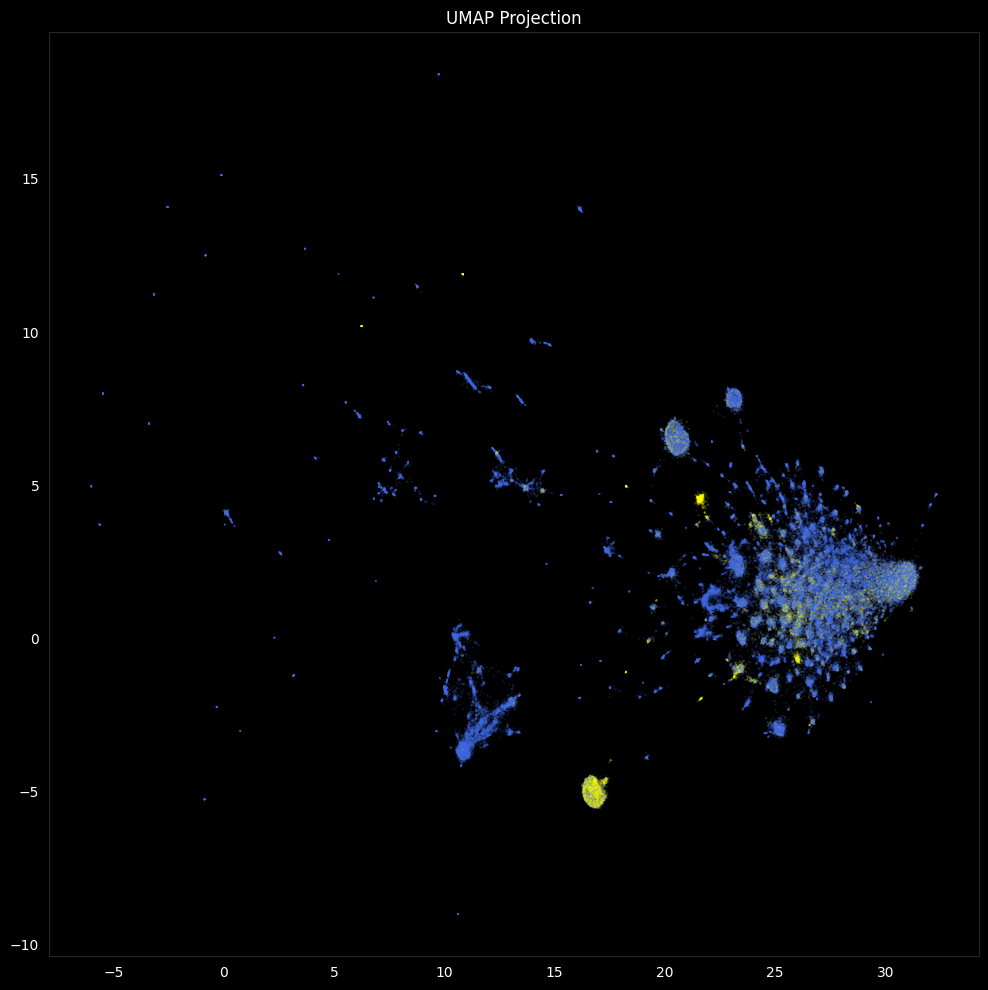

In [13]:
umap_graph(umap_embedding, y)